# Titanic Data
### Machine Learning

In [1]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
data = pd.read_csv('Preprocessed_train_data.csv')

### Results for Kaggle

In [121]:
#model can be changed 
def gen_Kaggle_output(model,file_name):
    Kaggle_test_data = pd.read_csv('Preprocessed_test_data.csv')
    temp = pd.read_csv('titanic_test.csv')
    temp['Survived']=model.predict(Kaggle_test_data)
    result = temp[['PassengerId','Survived']]
    result.to_csv(file_name,index=False)

In [8]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Is male?,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [9]:
data['Is male?'].value_counts()

1    577
0    314
Name: Is male?, dtype: int64

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['Survived'],axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[['Age','SibSp','Parch','Fare']] = sc.fit_transform(X_train[['Age','SibSp','Parch','Fare']],y_train)

C:\Users\MGHADERI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\MGHADERI\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Is male?,Embarked_Q,Embarked_S
199,-0.321542,-0.476719,-0.484674,-0.377085,1,0,0,0,1
703,-0.245935,-0.476719,-0.484674,-0.477489,0,1,1,1,0
823,-0.094721,-0.476719,0.743396,-0.387109,0,1,0,0,1
236,1.190599,0.450669,-0.484674,-0.128857,1,0,1,0,1
679,0.585742,-0.476719,0.743396,9.157323,0,0,1,0,0


In [19]:
X_test[['Age','SibSp','Parch','Fare']] = sc.transform(X_test[['Age','SibSp','Parch','Fare']])
test_data[['Age','SibSp','Parch','Fare']] = sc.transform(test_data[['Age','SibSp','Parch','Fare']])

C:\Users\MGHADERI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MGHADERI\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Machine Learning Models

### 1) Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
res = pd.DataFrame()
res['Feature'] = X.columns
res['Coef'] = reg.coef_.ravel()
res.sort_values(['Coef'],ascending=False)

,Feature,Coef
3,Fare,0.150893
2,Parch,-0.014218
7,Embarked_Q,-0.243796
1,SibSp,-0.288277
0,Age,-0.389903
8,Embarked_S,-0.517637
4,Pclass_2,-0.638388
5,Pclass_3,-1.746956
6,Is male?,-2.582561


#### Performance on the training data

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       441
           1       0.76      0.70      0.73       271

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



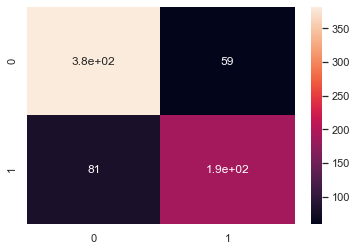

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

pred = reg.predict(X_train)
print(classification_report(y_train,pred))
sns.heatmap(confusion_matrix(y_train,pred),annot= True)

#### Performance on the test data

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       108
           1       0.76      0.66      0.71        71

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



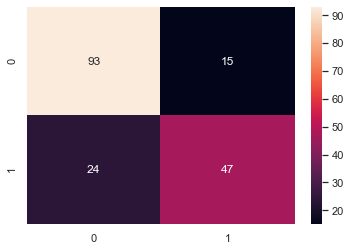

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

pred = reg.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot= True)

In order to verify that the model is performing good, I use the average cross validation score as the accuracy and I select
the best model achieved by cross validation.

In [77]:
from sklearn.model_selection import cross_val_score

In [81]:
cv_scores = cross_val_score(reg,X_train,y_train,cv=10,n_jobs=-1)
cv_scores

array([0.81944444, 0.84722222, 0.64788732, 0.84507042, 0.87323944,
       0.73239437, 0.77464789, 0.81690141, 0.87323944, 0.74647887])

In [80]:
np.mean(cv_scores)

0.7976525821596245

### 2) SVM

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [85]:
sv = SVC()

In [86]:
param_grid = {'C':[0.1,1,10,20,50],'gamma':[0.1,0.01,.001],'kernel':['poly','rbf']}

grid = GridSearchCV(SVC(),param_grid)

In [87]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 20, 50], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [88]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Performance on the training data

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       441
           1       0.82      0.74      0.78       271

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.84      0.84      0.84       712



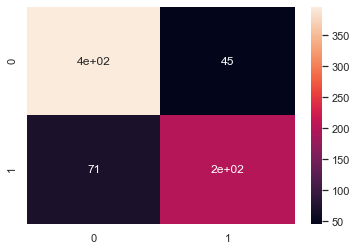

In [97]:
from sklearn.metrics import classification_report,confusion_matrix
pred = grid.predict(X_train)
print(classification_report(y_train,pred))
sns.heatmap(confusion_matrix(y_train,pred),annot= True)

#### Performance on the test data

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       108
           1       0.79      0.69      0.74        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



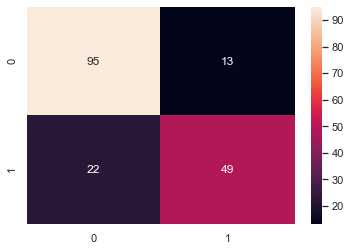

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

pred = grid.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [92]:
cv_scores = cross_val_score(grid,X_train,y_train,cv=10,n_jobs=-1)
cv_scores

array([0.84722222, 0.81944444, 0.73239437, 0.83098592, 0.91549296,
       0.74647887, 0.77464789, 0.84507042, 0.88732394, 0.77464789])

In [93]:
np.mean(cv_scores)

0.8173708920187794

In [96]:
gen_Kaggle_output(grid,'SVM_result.csv')

### 3) KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn_grid = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[1,5,10,100]})
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Performance on the training data

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       441
           1       0.82      0.83      0.82       271

    accuracy                           0.87       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712



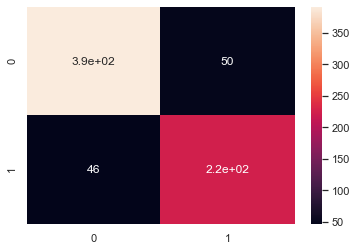

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

pred = knn_grid.predict(X_train)
print(classification_report(y_train,pred))
sns.heatmap(confusion_matrix(y_train,pred),annot= True)

#### Performance on the test data

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.72      0.70      0.71        71

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



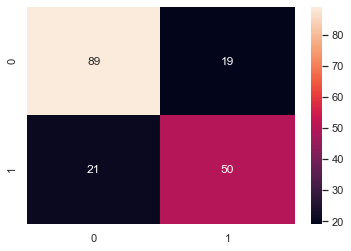

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

pred = knn_grid.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [105]:
cv_scores = cross_val_score(knn_grid,X_train,y_train,cv=10,n_jobs=-1)
cv_scores

array([0.77777778, 0.76388889, 0.83098592, 0.78873239, 0.88732394,
       0.66197183, 0.78873239, 0.78873239, 0.81690141, 0.76056338])

In [106]:
np.mean(cv_scores)

0.7865610328638498

In [107]:
gen_Kaggle_output(knn_grid,'KNN_result.csv')

### Bagging

In [114]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator=grid,n_estimators=10,n_jobs=-1,random_state=42)

In [115]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=GridSearchCV(cv=None, error_score=nan,
                                              estimator=SVC(C=1.0,
                                                            break_ties=False,
                                                            cache_size=200,
                                                            class_weight=None,
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3,
                                                            gamma='scale',
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                

In [117]:
cv_bg = cross_val_score(bg,X_train,y_train,cv=10,n_jobs=-1)
cv_bg

array([0.84722222, 0.86111111, 0.77464789, 0.8028169 , 0.91549296,
       0.69014085, 0.76056338, 0.87323944, 0.88732394, 0.77464789])

In [113]:
np.mean(cv_bg)

0.8132824726134584

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       108
           1       0.81      0.65      0.72        71

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



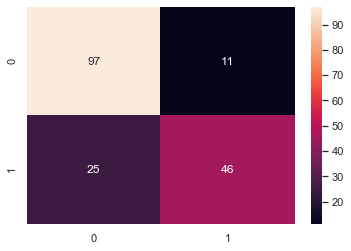

In [118]:
pred = bg.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [120]:
gen_Kaggle_output(bg,'Bagging_result.csv')